In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [23]:
data = pd.read_csv('obama.csv', parse_dates=['year_month']) #parse_dates : parsing the column as datestamp
data.head()

,year_month,survey_organization,approve_percent,disapprove_percent
0,2009-01-01,ABC/Post,80.0,15.0
1,2009-01-01,AP-GFK,74.0,15.0
2,2009-01-01,CNN,84.0,14.0
3,2009-01-01,Democracy Corps (D),51.0,20.0
4,2009-01-01,Diageo/Hotline,64.0,6.5


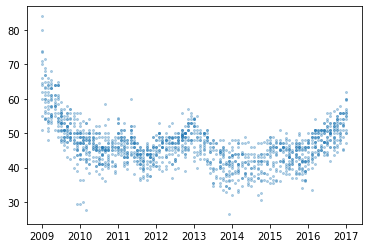

In [24]:
#plt.plt(x axis, y axis, mark the point as 'o' without any lines between them, markersize, alpha: transparent)
plt.plot(data.year_month, data.approve_percent,'o',markersize=2,alpha=0.3)
plt.show()

## Mean / Median of Approve and Disapprove Percent

In [29]:
data_mean = data.groupby('year_month').mean()
data_mean.head()

,approve_percent,disapprove_percent
year_month,,
2009-01-01,67.307692,19.346154
2009-02-01,61.500000,26.289474
2009-03-01,57.842105,34.026316
2009-04-01,59.282609,33.195652
2009-05-01,58.966667,34.900000


In [38]:
data_median = data.groupby('year_month').median()
data_median.head()

,approve_percent,disapprove_percent
year_month,,
2009-01-01,66.0,17.0
2009-02-01,61.0,26.0
2009-03-01,58.0,31.5
2009-04-01,59.5,31.5
2009-05-01,58.5,33.5


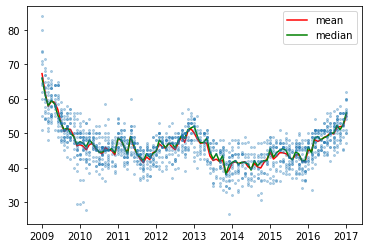

In [43]:
plt.plot(data_mean.index, data_mean.approve_percent,'red')
plt.plot(data_median.index,data_median.approve_percent,'green')
plt.legend(['mean', 'median'])

plt.plot(data.year_month, data.approve_percent, 'o', markersize=2, alpha=0.3)
plt.show()

## Approval Percentile

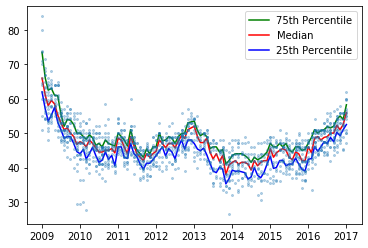

In [50]:
new_data = data[['year_month', 'approve_percent', 'disapprove_percent']]

data_25 = new_data.groupby('year_month').quantile(0.25)
data_75 = new_data.groupby('year_month').quantile(0.75)

plt.plot(data_75.index, data_75.approve_percent, 'green')
plt.plot(data_median.index, data_median.approve_percent, 'red')
plt.plot(data_25.index, data_25.approve_percent, 'blue')
plt.plot(data.year_month, data.approve_percent, 'o', markersize=2,alpha=0.3)

plt.legend(['75th Percentile', 'Median', '25th Percentile'])
plt.show()